In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values, format_wordcloud_text
from ipynb.fs.full.plots import single_barplot, wordcloud

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [4]:
df[['D15_ML_Algorithms_Apriori', 'D15_ML_Algorithms_Bayesian', 'D15_ML_Algorithms_DBSCAN', 'D15_ML_Algorithms_Decision_Tree',
'D15_ML_Algorithms_Ensembles', 'D15_ML_Algorithms_Gaussian_Mixture', 'D15_ML_Algorithms_KMeans', 'D15_ML_Algorithms_KNN',
'D15_ML_Algorithms_Linear_Regression', 'D15_ML_Algorithms_Logistic_Regression', 'D15_ML_Algorithms_Naive_Bayes',
'D15_ML_Algorithms_Neural_Networks', 'D15_ML_Algorithms_SVM', 'D15_ML_Algorithms_Others']].head()

,D15_ML_Algorithms_Apriori,D15_ML_Algorithms_Bayesian,D15_ML_Algorithms_DBSCAN,D15_ML_Algorithms_Decision_Tree,D15_ML_Algorithms_Ensembles,D15_ML_Algorithms_Gaussian_Mixture,D15_ML_Algorithms_KMeans,D15_ML_Algorithms_KNN,D15_ML_Algorithms_Linear_Regression,D15_ML_Algorithms_Logistic_Regression,D15_ML_Algorithms_Naive_Bayes,D15_ML_Algorithms_Neural_Networks,D15_ML_Algorithms_SVM,D15_ML_Algorithms_Others
2,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted
3,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted
4,not quoted,not quoted,quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted
5,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted
6,quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,quoted,quoted,quoted,quoted,quoted,quoted


In [5]:
print(df['D15_ML_Algorithms_Apriori'].value_counts())
print()
print("Total de Questões marcadas: " + str(df['D15_ML_Algorithms_Apriori'].value_counts()['quoted']))

not quoted    257
quoted         19
Name: D15_ML_Algorithms_Apriori, dtype: int64

Total de Questões marcadas: 19


In [6]:
algorithms = ['Apriori', 'Bayesian Networks', 'DBSCAN', 'Decision Trees', 'Ensembles', 'Gaussian Mixtures', 'K-Means', 'KNN', 
              'Lin/Poly Regression', 'Log Regression', 'Naive Bayes', 'Neural Networks', 'SVM']

In [7]:
# the values follow the same position of previous declared list
algorithms_total = [
    df['D15_ML_Algorithms_Apriori'].value_counts()['quoted'],
    df['D15_ML_Algorithms_Bayesian'].value_counts()['quoted'],
    df['D15_ML_Algorithms_DBSCAN'].value_counts()['quoted'],
    df['D15_ML_Algorithms_Decision_Tree'].value_counts()['quoted'],
    df['D15_ML_Algorithms_Ensembles'].value_counts()['quoted'],
    df['D15_ML_Algorithms_Gaussian_Mixture'].value_counts()['quoted'],
    df['D15_ML_Algorithms_KMeans'].value_counts()['quoted'],
    df['D15_ML_Algorithms_KNN'].value_counts()['quoted'],
    df['D15_ML_Algorithms_Linear_Regression'].value_counts()['quoted'],
    df['D15_ML_Algorithms_Logistic_Regression'].value_counts()['quoted'],
    df['D15_ML_Algorithms_Naive_Bayes'].value_counts()['quoted'],
    df['D15_ML_Algorithms_Neural_Networks'].value_counts()['quoted'],
    df['D15_ML_Algorithms_SVM'].value_counts()['quoted'],
]

In [8]:
# dataframe specific for question D15
d15_df= pd.DataFrame(data={'Algorithms': algorithms, 'Answers': algorithms_total})

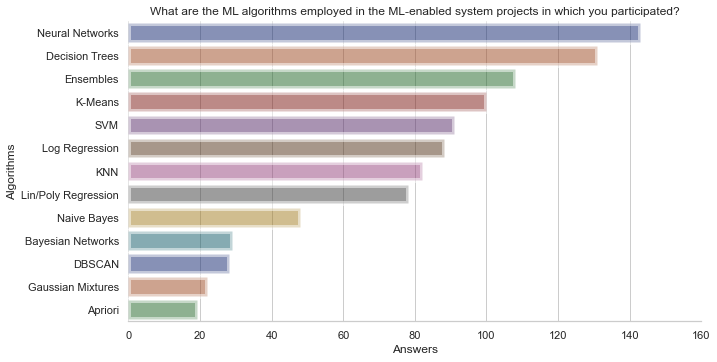

In [9]:
# we sort the dataframe to plot the bars decreasingly
single_barplot(d15_df.sort_values(by=['Answers'], ascending=False), "Answers", "Algorithms", 
               title="What are the ML algorithms employed in the ML-enabled system projects in which you participated?",
               x_label="Answers", y_label="Algorithms")

In [10]:
for other in list(df['D15_ML_Algorithms_Others_Free'].unique()):
    print(other)

-99
GNN
LGBM   Catboosting
Kaplan Meyer, PCA, LDA, ANOVA, ARIMA seasonal, IRT 
Fuzzy Logic, Evolutionary Computation
nan
Markovian Decision Processes and Uncertainty
Multi Armed Bandit
Inductive Logic Programming, Non-Negative Matrix Factorization, PCA, SVD, 
BERT, Yolo
Secret ones that can not be disclosed
Prophet
Transformers
Semantic analysis
CRF
Evolutionary algorithms
not sure as I am not the developper myself
Behavior Trees
PCA
reinforcement learning
Custom tensor-calculus algorithm
Ridge, LASSO/LARS Regressions
CNN
Isolation Forest
LUIS.AI from Microsoft Cognitive Services was used (NLP)
Optimisation Metaheuristics, Reinforcement Learning
??? Filtering
Hierarchical clustering of time series
Auto ML
FP-growth
Modelo predictive control
Time series
Operational Neural Networks
Specific Text Analysis and Text Mining algorithms.
IBM service, unknow algorithm 


In [11]:
list(df['D15_ML_Algorithms_Others_Free'].unique())

['-99',
 'GNN',
 'LGBM   Catboosting',
 'Kaplan Meyer, PCA, LDA, ANOVA, ARIMA seasonal, IRT ',
 'Fuzzy Logic, Evolutionary Computation',
 nan,
 'Markovian Decision Processes and Uncertainty',
 'Multi Armed Bandit',
 'Inductive Logic Programming, Non-Negative Matrix Factorization, PCA, SVD, ',
 'BERT, Yolo',
 'Secret ones that can not be disclosed',
 'Prophet',
 'Transformers',
 'Semantic analysis',
 'CRF',
 'Evolutionary algorithms',
 'not sure as I am not the developper myself',
 'Behavior Trees',
 'PCA',
 'reinforcement learning',
 'Custom tensor-calculus algorithm',
 'Ridge, LASSO/LARS Regressions',
 'CNN',
 'Isolation Forest',
 'LUIS.AI from Microsoft Cognitive Services was used (NLP)',
 'Optimisation Metaheuristics, Reinforcement Learning',
 '??? Filtering',
 'Hierarchical clustering of time series',
 'Auto ML',
 'FP-growth',
 'Modelo predictive control',
 'Time series',
 'Operational Neural Networks',
 'Specific Text Analysis and Text Mining algorithms.',
 'IBM service, unknow al

In [12]:
algorithms_free = list(filter(lambda a: str(a) != '-99', list(df['D15_ML_Algorithms_Others_Free'])))
algorithms_free = list(filter(lambda a: str(a) != 'nan', algorithms_free))

In [13]:
algorithms = format_wordcloud_text(algorithms_free, True)

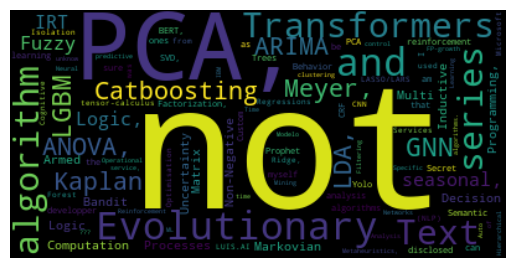

In [14]:
wordcloud(algorithms)